In [1]:
import matplotlib.pyplot as plt
import matplotlib
from pylab import figure, text, scatter, show
import sys, math, numpy
import seaborn as sns
sns.set_theme()
sns.set_style(style='white')
sns.set_style("ticks")

In [2]:
def get_dist(sysname, distlabel):
    """Get the distances for a edge in sys."""
    _basedir = f"/scratch/users/zilins/6.proj_ges_imi/2.datasets/rawds"
    edge_label = numpy.load(f"{_basedir}/label_edges.npy")
    edge_dist  = numpy.load(f"{_basedir}/ges_imi.{sysname}.edge_dist.npy")
    i = numpy.where(distlabel==edge_label)
    dist = numpy.squeeze(edge_dist[:, i])
    return dist

def get_chrg(sysname, chrglabel):
    """Get the NBO charges for a edge in sys."""
    _basedir = f"/scratch/users/zilins/6.proj_ges_imi/2.datasets/rawds"
    node_labels = numpy.load(f"{_basedir}/label_nodes.npy")
    chrg_arrays = numpy.load(f"{_basedir}/ges_imi.{sysname}.node_nbo.npy")
    i = numpy.where(chrglabel==node_labels)
    chrg = numpy.squeeze(chrg_arrays[:, i])
    return chrg
_basedir = f"/scratch/users/zilins/6.proj_ges_imi/2.datasets/rawds"
print(numpy.load(f"{_basedir}/label_edges.npy"))
print(numpy.load(f"{_basedir}/label_nodes.npy"))

['TIP3.287.OH2:IMI.286.C7' 'IMI.286.C7:TIP3.287.OH2'
 'SER.64.OG:IMI.286.C7' 'IMI.286.C7:SER.64.OG' 'LYS.67.NZ:LYS.67.HZ1'
 'LYS.67.HZ1:LYS.67.NZ' 'SER.64.OG:LYS.67.HZ1' 'LYS.67.HZ1:SER.64.OG'
 'TIP3.287.OH2:TIP3.287.H1' 'TIP3.287.H1:TIP3.287.OH2'
 'GLU.161.OE1:TIP3.287.H1' 'TIP3.287.H1:GLU.161.OE1'
 'TIP3.287.OH2:LYS.67.HZ1' 'LYS.67.HZ1:TIP3.287.OH2'
 'IMI.286.O15:LYS.67.HZ1' 'LYS.67.HZ1:IMI.286.O15' 'LYS.67.NZ:LYS.67.HZ2'
 'LYS.67.HZ2:LYS.67.NZ' 'ASN.127.OD1:LYS.67.HZ2' 'LYS.67.HZ2:ASN.127.OD1'
 'GLU.161.OE1:LYS.67.HZ2' 'LYS.67.HZ2:GLU.161.OE1' 'LYS.67.NZ:LYS.67.HZ3'
 'LYS.67.HZ3:LYS.67.NZ' 'SER.64.OG:LYS.67.HZ3' 'LYS.67.HZ3:SER.64.OG'
 'ASN.127.ND2:ASN.127.HD22' 'ASN.127.HD22:ASN.127.ND2'
 'IMI.286.O15:ASN.127.HD22' 'ASN.127.HD22:IMI.286.O15'
 'SER.165.OG:SER.165.HG1' 'SER.165.HG1:SER.165.OG'
 'GLU.161.OE2:SER.165.HG1' 'SER.165.HG1:GLU.161.OE2'
 'TIP3.287.OH2:TIP3.287.H2' 'TIP3.287.H2:TIP3.287.OH2'
 'SER.165.OG:TIP3.287.H2' 'TIP3.287.H2:SER.165.OG'
 'IMI.286.O15:IMI.286.H15O' 'IMI.2

In [3]:
edge_list = ["SER.64.OG:LYS.67.HZ1",     "GLU.161.OE1:TIP3.287.H1",  "IMI.286.C7:TIP3.287.OH2",
             "SER.64.OG:LYS.67.HZ3",     "ASN.127.OD1:LYS.67.HZ2",   "ASN.127.OD1:IMI.286.H15O", "GLU.161.OE1:LYS.67.HZ2", 
             "GLU.161.OE2:SER.165.HG1",  "GLU.161.OE1:IMI.286.H15O", "SER.165.OG:TIP3.287.H2",   "IMI.286.O15:LYS.67.HZ1",   
             "IMI.286.O15:ASN.127.HD22", "IMI.286.C7:IMI.286.O15",   "TIP3.287.OH2:LYS.67.HZ1",  "TIP3.287.OH2:IMI.286.H15O",
             "SER.64.OG:SER.64.HG1",     "IMI.286.O7:SER.64.HG1"]

edge_label= [r"Ser70 O$\gamma$ - Lys73 H$\zeta$1",      r"Glu166 O$\epsilon$1 - Water H1",        "IPM C7 - Water O",
             r"Ser70 O$\gamma$ - Lys73 H$\zeta$3",      r"Asn132 O$\delta$ - Lys73 H$\zeta$2",    r"Asn132 O$\delta$ - IPM HO6$\alpha$",  r"Glu166 O$\epsilon$1 - Lys73 H$\zeta$2",
             r"Glu166 O$\epsilon$2 - Ser170 H$\gamma$", r"Glu166 O$\epsilon$1 - IPM HO6$\alpha$", r"Ser170 O$\gamma$ - Water H2", r"IPM O6$\alpha$ - Lys73 H$\zeta$1",
             r"IPM O6$\alpha$ - Asn132 H$\delta$2",     r"IPM C7 - IPM O6$\alpha$",               r"Water O - Lys73 H$\zeta$1",   r"Water O - IPM HO6$\alpha$",
             r"Ser70 O$\gamma$ - IPM H4",     "IPM O7 - IPM H4"]

node_list = ['SER.64.OG',    'LYS.67.NZ',  'LYS.67.HZ1',  'GLU.161.OE1', 'IMI.286.C7',   
             'TIP3.287.OH2', 'TIP3.287.H1',
             'LYS.67.HZ2',   'LYS.67.HZ3', 'ASN.127.OD1', 'ASN.127.ND2', 'ASN.127.HD22', 
             'GLU.161.OE2',  'SER.165.OG', 'SER.165.HG1', 'IMI.286.O7',  'IMI.286.O15', 
             'IMI.286.H15O', 'TIP3.287.H2',
             'IMI.286.N4',   'SER.64.HG1']

node_label = [r'Ser70 O$\gamma$',     r'Lys73 N$\zeta$',   r'Lys73 H$\zeta$1',  r'Glu166 O$\epsilon$1',  'IPM C7', 
                'Water O',              'Water H1', 
               r'Lys73 H$\zeta$2',     r'Lys73 H$\zeta$3',  r'Asn132 O$\delta$', r'Asn132 N$\delta$',    r'Asn132 H$\delta$2',
               r'Glu166 O$\epsilon$2', r'Ser170 O$\gamma$', r'Ser170 H$\gamma$',  'IPM O7',              r'IPM O6$\alpha$',
               r'IPM HO6$\alpha$',      'Water H2',
                'IPM N4',              r'Ser70 H$\gamma$']

edge1 = numpy.asarray([get_dist('d1', el) for el in edge_list]).T[:, :15]
edge2 = numpy.asarray([get_dist('d2', el) for el in edge_list]).T
node1 = numpy.asarray([get_chrg('d1', nd) for nd in node_list]).T[:, :19]
node2 = numpy.asarray([get_chrg('d2', nd) for nd in node_list]).T

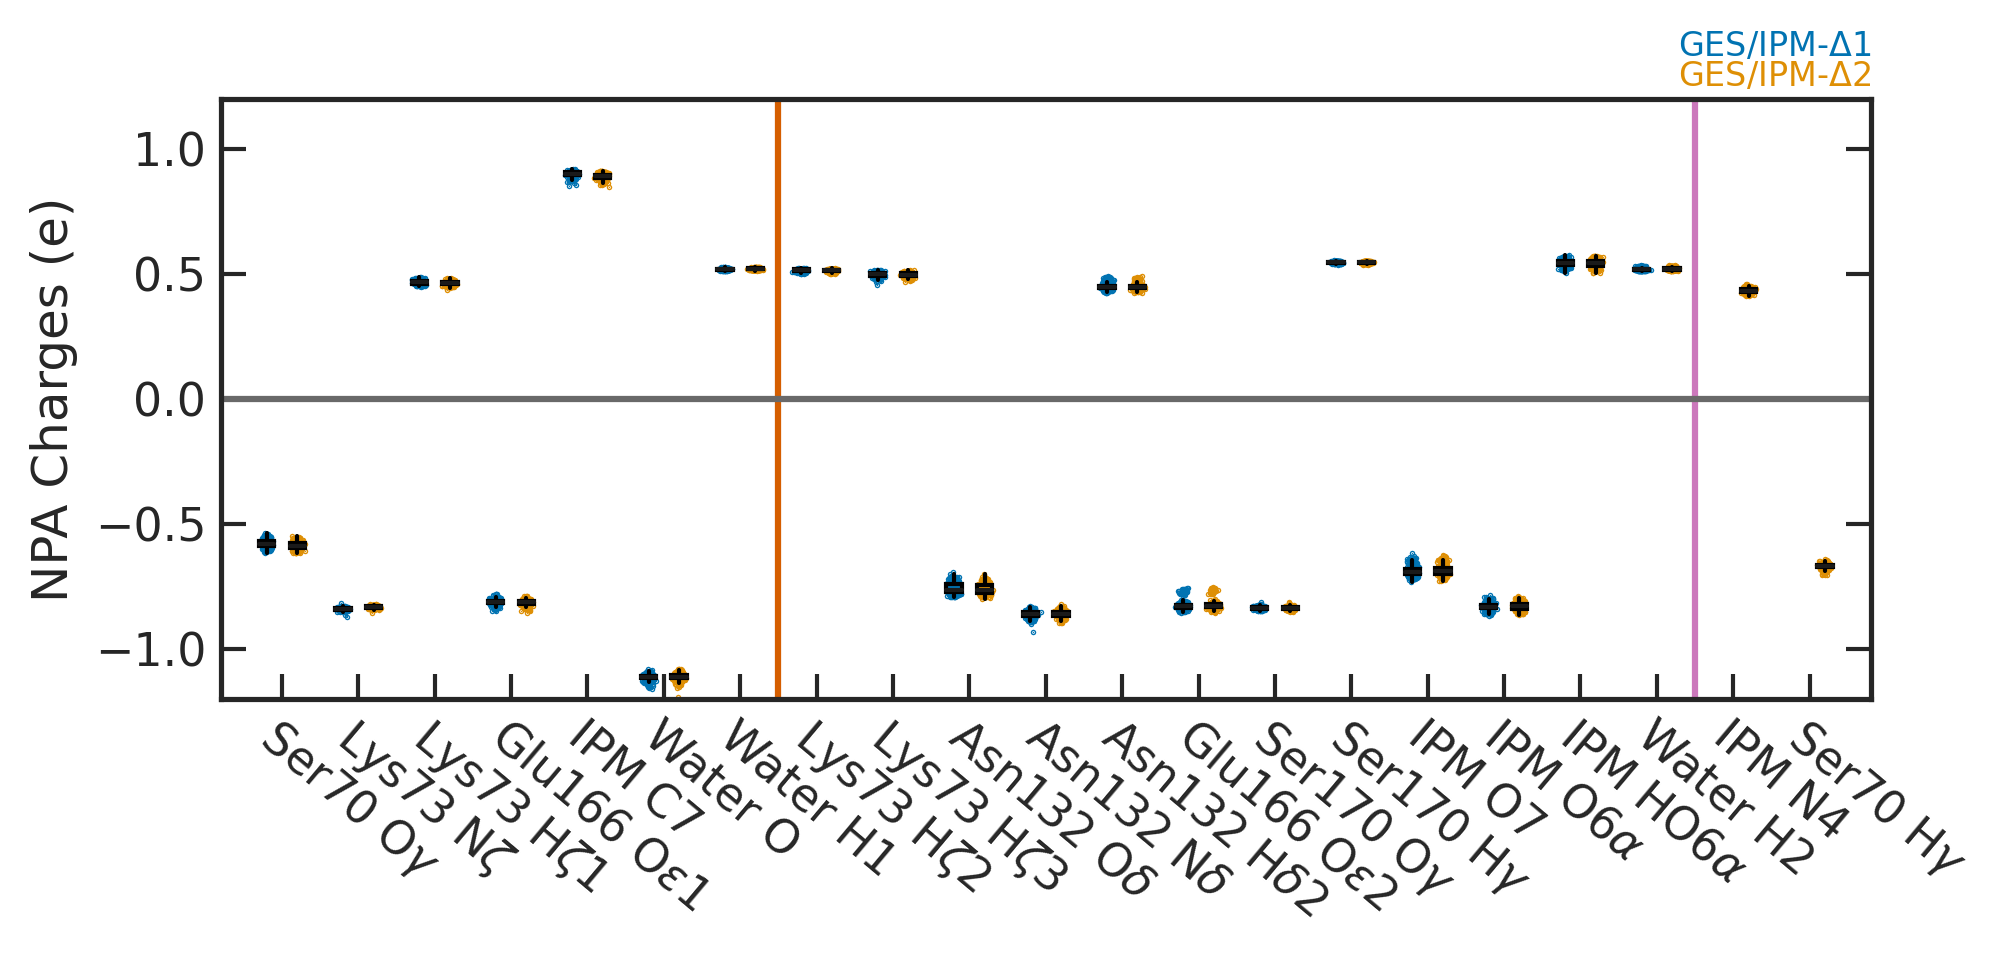

In [4]:
fig, ax,  = plt.subplots(figsize=(7.5, 3.5), dpi=300, facecolor='w', edgecolor='k', )
plt.subplots_adjust(left=1./7.5, right=6.5/7.5, top=3/3.5, bottom=1./3.5)

# ===
y_d1 = numpy.arange(0, node1.shape[1])
y_d2 = numpy.arange(0, node2.shape[1])
# ===
ax.text(1., 1.06, r'GES/IPM-$\Delta$1', ha='right', va='bottom', transform=ax.transAxes, fontsize=8, color=sns.color_palette('colorblind')[0])
ax.text(1., 1.01, r'GES/IPM-$\Delta$2', ha='right', va='bottom', transform=ax.transAxes, fontsize=8, color=sns.color_palette('colorblind')[1])
# ===
d1_boxes = ax.boxplot(x=node1, positions=y_d1-0.20, widths=0.2, showcaps=False, showfliers=False, medianprops=dict(color='k'), patch_artist=True, vert=True)
d2_boxes = ax.boxplot(x=node2, positions=y_d2+0.20, widths=0.2, showcaps=False, showfliers=False, medianprops=dict(color='k'), patch_artist=True, vert=True)
plt.setp(d1_boxes["boxes"], facecolor='#00000000')
plt.setp(d2_boxes["boxes"], facecolor='#00000000')
# ===
for i in range(node1.shape[1]):
    ax.scatter(y=node1[:, i], x=numpy.random.normal(loc=y_d1[i]-0.20, scale=0.03, size=node1.shape[0]), s=0.1, color=sns.color_palette('colorblind')[0])
for i in range(node2.shape[1]):
    ax.scatter(y=node2[:, i], x=numpy.random.normal(loc=y_d2[i]+0.20, scale=0.03, size=node2.shape[0]), s=0.1, color=sns.color_palette('colorblind')[1])
# ===
ax.plot([ 6.5,  6.5], [-2,2], c=sns.color_palette('colorblind')[3], lw=1.5, zorder=1)
ax.plot([18.5, 18.5], [-2,2], c=sns.color_palette('colorblind')[4], lw=1.5, zorder=1)
ax.plot([-0.8, 20.8], [ 0,0], c='dimgrey',                          lw=1.5, zorder=1)

ax.set_xticks(numpy.arange(0, len(node_label)))
ax.set_xticklabels(node_label, ha='left', va='top', rotation=-40, rotation_mode="anchor")

ax.tick_params(which='major', direction='in', length=6, width=1)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(-0.8,  20.8)
ax.set_ylim(-1.2,  1.2)
ax.set_ylabel('NPA Charges (e)')

fig.savefig(f'npa_distri.png')

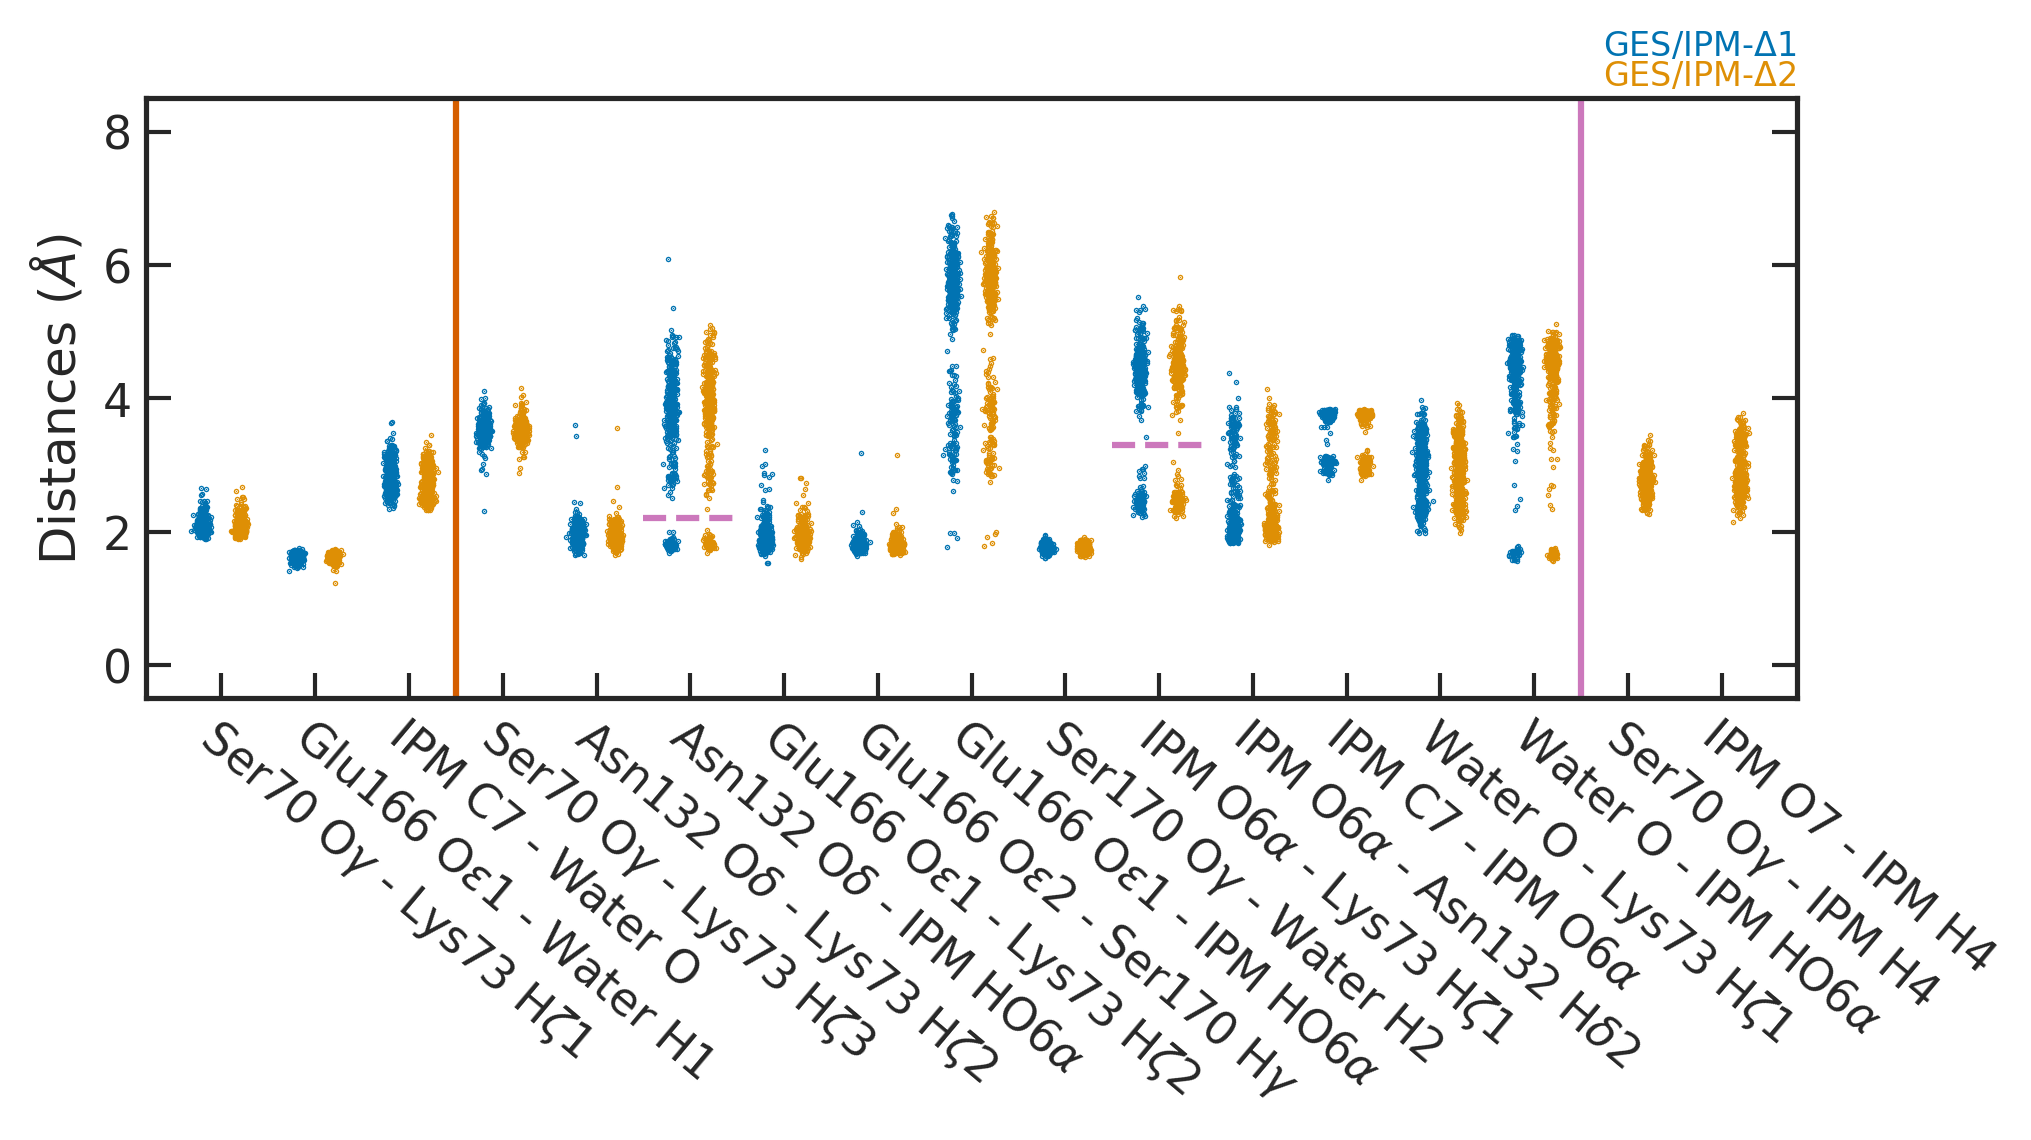

In [7]:
fig, ax,  = plt.subplots(figsize=(7.5, 4.), dpi=300, facecolor='w', edgecolor='k', )
plt.subplots_adjust(left=1./7.5, right=6.5/7.5, top=3.5/4., bottom=1.5/4.)

# ===
y_d1 = numpy.arange(edge1.shape[1])
y_d2 = numpy.arange(edge2.shape[1])
# ===
ax.text(1., 1.06, r'GES/IPM-$\Delta$1', ha='right', va='bottom', transform=ax.transAxes, fontsize=8, color=sns.color_palette('colorblind')[0])
ax.text(1., 1.01, r'GES/IPM-$\Delta$2', ha='right', va='bottom', transform=ax.transAxes, fontsize=8, color=sns.color_palette('colorblind')[1])
# ===
for i in range(edge1.shape[1]):
    ax.scatter(y=edge1[:, i], x=numpy.random.normal(loc=y_d1[i]-0.20, scale=0.03, size=edge1.shape[0]), s=0.1, color=sns.color_palette('colorblind')[0])
for i in range(edge2.shape[1]):
    ax.scatter(y=edge2[:, i], x=numpy.random.normal(loc=y_d2[i]+0.20, scale=0.03, size=edge2.shape[0]), s=0.1, color=sns.color_palette('colorblind')[1])

# ===
ax.plot([ 2.5,  2.5], [-1, 9], c=sns.color_palette('colorblind')[3], lw=1.5, zorder=1)
ax.plot([14.5, 14.5], [-1, 9], c=sns.color_palette('colorblind')[4], lw=1.5, zorder=1)

ax.plot([ 4.5,  5.5], [2.2, 2.2], c=sns.color_palette('colorblind')[4], lw=1.5, zorder=1, ls='--')
# ax.plot([ 7.5,  8.5], [2.3, 2.3], c=sns.color_palette('colorblind')[4], lw=1.5, zorder=1, ls='--')
ax.plot([ 9.5, 10.5], [3.3, 3.3], c=sns.color_palette('colorblind')[4], lw=1.5, zorder=1, ls='--')
# ax.plot([13.5, 14.5], [2.0, 2.0], c=sns.color_palette('colorblind')[4], lw=1.5, zorder=1, ls='--')
# ax.plot([ 7.5,  8.5], [4.8, 4.8], c=sns.color_palette('colorblind')[4], lw=1.5, zorder=1, ls='--')
# ax.plot([10.5, 11.5], [2.5, 2.5], c=sns.color_palette('colorblind')[4], lw=1.5, zorder=1, ls='--')
# ax.plot([13.5, 14.5], [2.8, 2.8], c=sns.color_palette('colorblind')[4], lw=1.5, zorder=1, ls='--')

ax.set_xticks(numpy.arange(0, len(edge_label)))
ax.set_xticklabels(edge_label, ha='left', va='top', rotation=-40, rotation_mode="anchor")

ax.tick_params(which='major', direction='in', length=6, width=1)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(-0.8, 16.8)
ax.set_ylim(-0.5,  8.5)
ax.set_ylabel(r'Distances ($\AA$)')

fig.savefig(f'dist_distri.png')